<h1>CLEANING THE MOVIE DATA</h1>

<h2>Import Libraries</h2>


In [133]:
import pandas as pd
import numpy as np
import unicodedata
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import re

<h2>Load data & preproccessing</h2>

<p>Next we'll load the used data from a csv file.</p>

In [134]:
df = pd.read_csv('data/elokuvadata.csv', sep=';')
df


/tmp/ipykernel_4387/2646807025.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/elokuvadata.csv', sep=';')


,Elokuvan suomenkielinen nimi,Alkuperäinen nimi,IMDb ID ja linkki,Katsojat,Lipputulot €,Ensi-ilta,Ensi-iltavuosi,Valmistumisvuosi,Ohjaaja,Ohjaajan sukupuoli,...,2000-luku.1,2010-luku.1,2020-luku.1,Järjestys,IMDB id,IMDb linkki,Elonet-osoite,Huomioita,Unnamed: 124,Unnamed: 125
0,Titanic,Titanic,tt0120338,\t1 114 954,"\t7 728 955,71",1/16/98,1998.0,1997.0,James Cameron,m,...,"\t114,37",\t-,\t-,5505.0,tt0120338,https://www.imdb.com/title/tt0120338/,https://elonet.finna.fi/Record/kavi.elonet_elo...,0,1.0,NaN
1,Tuntematon sotilas,Tuntematon sotilas,tt4065552,\t1 023 514,"\t14 190 080,11",10/27/17,2017.0,2017.0,Aku Louhimies,m,...,\t-,"\t14 188 838,11","\t1 242,00",10920.0,tt4065552,https://www.imdb.com/title/tt4065552/,https://elonet.finna.fi/Record/kavi.elonet_elo...,0,1.0,NaN
2,Yksi lensi yli käenpesän,One Flew Over the Cuckoo's Nest,tt0073486,\t821 805,"\t52 911,18",3/19/76,1976.0,1975.0,Milos Forman,m,...,\t-,\t-,"\t911,00",1499.0,tt0073486,https://www.imdb.com/title/tt0073486/,https://elonet.finna.fi/Record/kavi.elonet_elo...,0,1.0,NaN
3,Papillon,Papillon,tt0070511,\t759 301,"\t12 076,74",1/25/74,1974.0,1973.0,Franklin J. Schaffner,m,...,\t-,\t-,\t-,1566.0,tt0070511,https://www.imdb.com/title/tt0070511/,https://elonet.finna.fi/Record/kavi.elonet_elo...,0,1.0,NaN
4,Uuno Turhapuro armeijan leivissä,Uuno Turhapuro armeijan leivissä,tt0088336,\t750 965,\t-,8/31/84,1984.0,1984.0,Ere Kokkonen,m,...,\t-,\t-,\t-,2891.0,tt0088336,https://www.imdb.com/title/tt0088336/,https://elonet.finna.fi/Record/kavi.elonet_elo...,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4>Drop irrelevant columns</h4>

<p>Next we'll pick the interesting data and remove completely empty rows from the end of the data frame.</p>

In [135]:
df = df[['Elokuvan suomenkielinen nimi', 'Alkuperäinen nimi', 'Katsojat', 'Lipputulot €', 'Ensi-ilta', 'Tuotantomaa', 'Genre', 'IMDb ID ja linkki']]

df = df[df['Elokuvan suomenkielinen nimi'].notna()]
df = df[df['Ensi-ilta'].notna()]

<p>Replace empty values, remove prefixes etc.</p>

In [136]:

df[['Katsojat', 'Lipputulot €']] = df[['Katsojat', 'Lipputulot €']].apply(lambda x: x.str.replace(u'\xa0', ''))
df[['Katsojat', 'Lipputulot €']] = df[['Katsojat', 'Lipputulot €']].apply(lambda x: x.str.replace(',', '.'))
df[['Katsojat', 'Lipputulot €']] = df[['Katsojat', 'Lipputulot €']].apply(lambda x: x.str.strip())
df.replace({'-':np.nan, '0':np.nan}, inplace=True)

df[['Katsojat', 'Lipputulot €']] = df[['Katsojat', 'Lipputulot €']].astype(float)
df = df[df['Ensi-ilta'].apply(lambda x: len(str(x)) <= 8 and len(str(x)) >= 6)]
df['Pvm'] = df['Ensi-ilta'].apply(lambda x: x[:-2]+'00')
df['Pvm'] = pd.to_datetime(df['Pvm'], format="%m/%d/%y")

df['Ensi-ilta'] = pd.to_datetime(df['Ensi-ilta'], format="%m/%d/%y")
df['Ensi-ilta'] = df['Ensi-ilta'].apply(lambda x: x.replace(year=int(x.year)-100) if x.year > 2022 else x)
df

,Elokuvan suomenkielinen nimi,Alkuperäinen nimi,Katsojat,Lipputulot €,Ensi-ilta,Tuotantomaa,Genre,IMDb ID ja linkki,Pvm
0,Titanic,Titanic,1114954.0,7728955.71,1998-01-16,US,"Drama, Romance",tt0120338,2000-01-16
1,Tuntematon sotilas,Tuntematon sotilas,1023514.0,14190080.11,2017-10-27,FI,"Drama, War",tt4065552,2000-10-27
2,Yksi lensi yli käenpesän,One Flew Over the Cuckoo's Nest,821805.0,52911.18,1976-03-19,US,Drama,tt0073486,2000-03-19
3,Papillon,Papillon,759301.0,12076.74,1974-01-25,US,"Biography, Crime, Drama",tt0070511,2000-01-25
4,Uuno Turhapuro armeijan leivissä,Uuno Turhapuro armeijan leivissä,750965.0,NaN,1984-08-31,FI,Comedy,tt0088336,2000-08-31
...,...,...,...,...,...,...,...,...,...
11878,713:a uhkaa tuho,713 prosit posadku,3.0,NaN,1967-08-11,SU,Thriller,tt0182667,2000-08-11
11879,Myrsky yli Aasian,Potomok Chingis-Khana,3.0,NaN,1951-11-16,SU,"Drama, War",tt0019286,2000-11-16
11880,Wildland,Kød & blod,3.0,NaN,2022-05-19,DK,"Crime, Drama, Thriller",tt8386958,2000-05-19
11881,Slalom,Slalom,3.0,NaN,2022-05-05,FR / BE,Drama,tt9697780,2000-05-05


Next let's clean the 'Genre' column


In [137]:

def trans(word):
    d = {'Musiikki':'Music', 'Kauhu':'Horror', 'Draama':'Drama', 'Animaatio':'Animation', 'Seikkailu':'Adventure', 'Romanttinen elokuva':'Romance', 'Lyhytelokuva':'Short', 'Historia':'History', 'Fantasia':'Fantasy', 'Perhe-elokuva':'Family'}
    if word in d:
        return d[word]
    return word


def clean(lista):
    lista = [re.sub("'", '', i.strip()) for i in lista]
    return [trans(j) for j in lista]

df['Genre'] = df['Genre'].apply(lambda x: str(x).split(','))
df['Genre'] = df['Genre'].apply(lambda x: clean(x))

lista = df['Genre'].sum()
lista = np.unique(lista)
lista

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western', 'nan'], dtype='<U11')

Rename the columns to be shorter & save the cleaned data

In [138]:
df = df.rename(columns={"Elokuvan suomenkielinen nimi":"Suom", "Alkuperäinen nimi": "Nimi", "Lipputulot €":"Tulot", "Ensi-ilta":"Ensi"})
df.to_csv('siivottu_leffadata.csv', index=False)

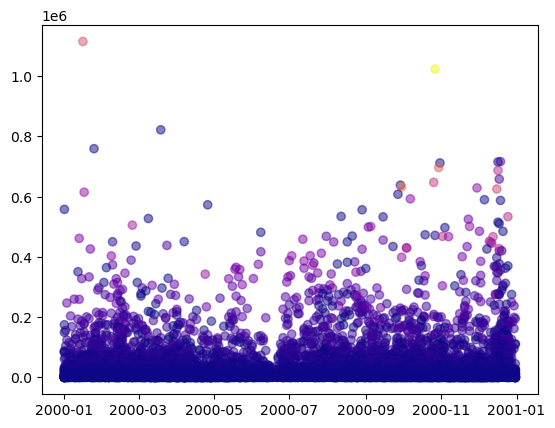

In [139]:
plt.scatter(x=df['Pvm'], y=df['Katsojat'], c=df['Tulot'], alpha=0.5, cmap='plasma')